/var/folders/qm/6p1s72nj2k3bg7q0b36nq2gc0000gn/T/ipykernel_16358/870916443.py:78: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.axis([np.min(positions[:, 0]), np.max(positions[:, 0]), np.min(positions[:, 1]), np.max(positions[:, 1])])
/var/folders/qm/6p1s72nj2k3bg7q0b36nq2gc0000gn/T/ipykernel_16358/870916443.py:78: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.axis([np.min(positions[:, 0]), np.max(positions[:, 0]), np.min(positions[:, 1]), np.max(positions[:, 1])])


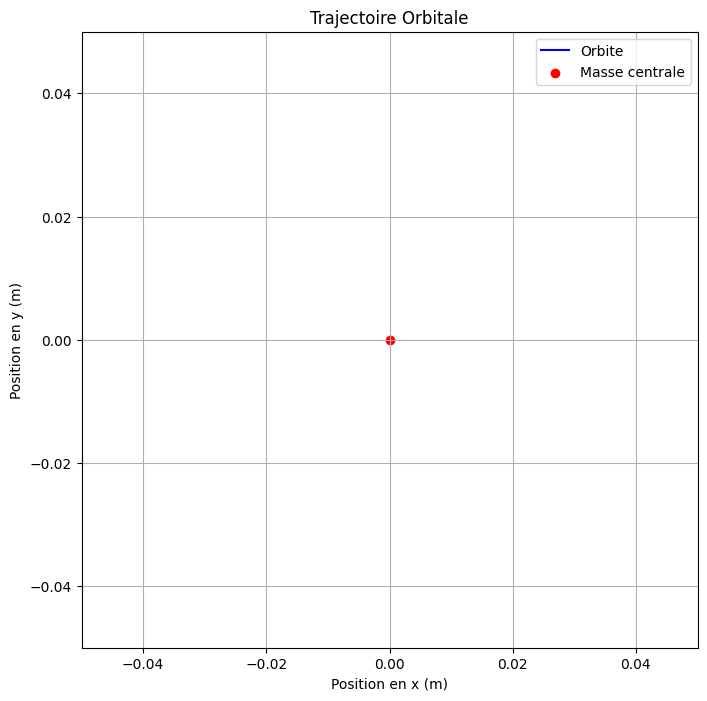

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class ParametresOrbitaux2D:
    def __init__(self, position, vitesse, masse_centrale):
        self.position = np.array(position)
        self.vitesse = np.array(vitesse)
        self.masse_centrale = masse_centrale

        self.distance_centrale = np.linalg.norm(self.position)
        self.vitesse_norme = np.linalg.norm(self.vitesse)
        self.parametre_gravitationnel = 6.67430e-11 * self.masse_centrale

    def energie_specifique(self):
        epsilon = 0.5 * self.vitesse_norme**2 - self.parametre_gravitationnel / self.distance_centrale
        return epsilon

    def moment_angulaire_specifique(self):
        h = np.cross(np.append(self.position, 0), np.append(self.vitesse, 0))
        return h

    def excentricite(self):
        epsilon = self.energie_specifique()
        h = self.moment_angulaire_specifique()
        e = np.sqrt(1 + (2 * epsilon * np.linalg.norm(h)**2) / self.parametre_gravitationnel**2)
        return e

    def inclinaison(self):
        h = self.moment_angulaire_specifique()
        inclinaison = np.arccos(h[2] / np.linalg.norm(h))
        return inclinaison

    def argument_periapside(self):
        h = self.moment_angulaire_specifique()
        e = self.excentricite()
        cos_omega = h[0] / (np.linalg.norm(h) * e)
        sin_omega = h[1] / (np.linalg.norm(h) * e)
        omega = np.arctan2(sin_omega, cos_omega)
        return omega

    def longitude_ascension_droite_noeud_ascendant(self):
        h = self.moment_angulaire_specifique()
        omega = self.argument_periapside()
        cos_Omega = h[0] / np.linalg.norm(h)
        sin_Omega = -h[1] / np.linalg.norm(h)
        Omega = np.arctan2(sin_Omega, cos_Omega)
        return Omega

class Orbite2D:
    def __init__(self, parametres_orbitaux):
        self.parametres_orbitaux = parametres_orbitaux

    def position_orbite(self, theta):
        e = self.parametres_orbitaux.excentricite()
        p = (np.linalg.norm(self.parametres_orbitaux.moment_angulaire_specifique()) ** 2) / self.parametres_orbitaux.parametre_gravitationnel
        r = p / (1 + e * np.cos(theta))
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        return np.array([x, y])

    def tracer_orbite(self, resolution=1000):
        # Calcul de l'angle de la trajectoire
        theta = np.linspace(0, 2 * np.pi, resolution)

        # Calcul des positions de l'orbite
        positions = np.array([self.position_orbite(t) for t in theta])

        # Tracer de l'orbite
        plt.figure(figsize=(8, 8))
        plt.plot(positions[:, 0], positions[:, 1], label='Orbite', color='b')
        plt.scatter(0, 0, color='r', label='Masse centrale')
        plt.xlabel('Position en x (m)')
        plt.ylabel('Position en y (m)')
        plt.title('Trajectoire Orbitale')
        plt.gca().set_aspect('equal', adjustable='box')

        # Définir le domaine des axes en fonction de l'orbite
        plt.axis([np.min(positions[:, 0]), np.max(positions[:, 0]), np.min(positions[:, 1]), np.max(positions[:, 1])])

        plt.legend()
        plt.grid(True)
        plt.show()

# Fonction pour calculer et tracer l'orbite en 2D
def tracer_orbite_2D(position_objet, vitesse_objet, masse_centrale):
    parametres_orbitaux = ParametresOrbitaux2D(position_objet, vitesse_objet, masse_centrale)
    orbite = Orbite2D(parametres_orbitaux)
    orbite.tracer_orbite()

# Exemple d'utilisation
position_objet = [1e6, 2e6]  # en mètres
vitesse_objet = [1000, 2000]  # en m/s
masse_centrale = 1e12  # en kg

tracer_orbite_2D(position_objet, vitesse_objet, masse_centrale)

In [7]:
import numpy as np

class ParametresOrbitaux:
    def __init__(self, position, vitesse, masse_centrale):
        self.position = np.array(position)
        self.vitesse = np.array(vitesse)
        self.masse_centrale = masse_centrale

        self.distance_centrale = np.linalg.norm(self.position)
        self.vitesse_norme = np.linalg.norm(self.vitesse)
        self.parametre_gravitationnel = 6.67430e-11 * self.masse_centrale

    def energie_specifique(self):
        epsilon = 0.5 * self.vitesse_norme**2 - self.parametre_gravitationnel / self.distance_centrale
        return epsilon

    def moment_angulaire_specifique(self):
        h = np.cross(self.position, self.vitesse)
        return h

    def excentricite(self):
        epsilon = self.energie_specifique()
        h = self.moment_angulaire_specifique()
        e = np.sqrt(1 + (2 * epsilon * np.linalg.norm(h)**2) / self.parametre_gravitationnel**2)
        return e

    def inclinaison(self):
        h = self.moment_angulaire_specifique()
        inclinaison = np.arccos(h[2] / np.linalg.norm(h))
        return inclinaison

    def argument_periapside(self):
        h = self.moment_angulaire_specifique()
        e = self.excentricite()
        cos_omega = h[0] / (np.linalg.norm(h) * e)
        sin_omega = h[1] / (np.linalg.norm(h) * e)
        omega = np.arctan2(sin_omega, cos_omega)
        return omega

    def longitude_ascension_droite_noeud_ascendant(self):
        h = self.moment_angulaire_specifique()
        omega = self.argument_periapside()
        cos_Omega = h[0] / np.linalg.norm(h)
        sin_Omega = -h[1] / np.linalg.norm(h)
        Omega = np.arctan2(sin_Omega, cos_Omega)
        return Omega

# Exemple d'utilisation
position_objet = [1e6, 2e6, 3e6]  # en mètres
vitesse_objet = [1000, 2000, 3000]  # en m/s
masse_centrale = 1e12  # en kg

parametres_orbitaux = ParametresOrbitaux(position_objet, vitesse_objet, masse_centrale)

print("Énergie spécifique:", parametres_orbitaux.energie_specifique())
print("Moment angulaire spécifique:", parametres_orbitaux.moment_angulaire_specifique())
print("Excentricité:", parametres_orbitaux.excentricite())
print("Inclinaison:", parametres_orbitaux.inclinaison())
print("Argument du périapside:", parametres_orbitaux.argument_periapside())
print("Longitude de l'ascension droite du nœud ascendant:", parametres_orbitaux.longitude_ascension_droite_noeud_ascendant())


Énergie spécifique: 6999999.999982161
Moment angulaire spécifique: [0. 0. 0.]
Excentricité: 1.0
Inclinaison: nan
Argument du périapside: nan
Longitude de l'ascension droite du nœud ascendant: nan


/var/folders/qm/6p1s72nj2k3bg7q0b36nq2gc0000gn/T/ipykernel_16358/2643085869.py:29: RuntimeWarning: invalid value encountered in scalar divide
  inclinaison = np.arccos(h[2] / np.linalg.norm(h))
/var/folders/qm/6p1s72nj2k3bg7q0b36nq2gc0000gn/T/ipykernel_16358/2643085869.py:35: RuntimeWarning: invalid value encountered in scalar divide
  cos_omega = h[0] / (np.linalg.norm(h) * e)
/var/folders/qm/6p1s72nj2k3bg7q0b36nq2gc0000gn/T/ipykernel_16358/2643085869.py:36: RuntimeWarning: invalid value encountered in scalar divide
  sin_omega = h[1] / (np.linalg.norm(h) * e)
/var/folders/qm/6p1s72nj2k3bg7q0b36nq2gc0000gn/T/ipykernel_16358/2643085869.py:43: RuntimeWarning: invalid value encountered in scalar divide
  cos_Omega = h[0] / np.linalg.norm(h)
/var/folders/qm/6p1s72nj2k3bg7q0b36nq2gc0000gn/T/ipykernel_16358/2643085869.py:44: RuntimeWarning: invalid value encountered in scalar divide
  sin_Omega = -h[1] / np.linalg.norm(h)


In [11]:
import numpy as np

class ParametresOrbitaux:
    def __init__(self, position, vitesse, masse_centrale):
        self.position = np.array(position)
        self.vitesse = np.array(vitesse)
        self.masse_centrale = masse_centrale

        self.distance_centrale = np.linalg.norm(self.position)
        self.vitesse_norme = np.linalg.norm(self.vitesse)
        self.parametre_gravitationnel = 6.67430e-11 * self.masse_centrale

    def energie_specifique(self):
        epsilon = 0.5 * self.vitesse_norme**2 - self.parametre_gravitationnel / self.distance_centrale
        return epsilon

    def moment_angulaire_specifique(self):
        h = np.cross(self.position, self.vitesse)
        return h

    def excentricite(self):
        epsilon = self.energie_specifique()
        h = self.moment_angulaire_specifique()
        e = np.sqrt(1 + (2 * epsilon * np.linalg.norm(h)**2) / self.parametre_gravitationnel**2)
        return e

# Exemple d'utilisation
position_objet = [1e6, 2e6]  # en mètres
vitesse_objet = [1000, 1000]  # en m/s
masse_centrale = 1e12  # en kg

parametres_orbitaux = ParametresOrbitaux(position_objet, vitesse_objet, masse_centrale)

print("Énergie spécifique:", parametres_orbitaux.energie_specifique())
print("Moment angulaire spécifique:", parametres_orbitaux.moment_angulaire_specifique())
print("Excentricité:", parametres_orbitaux.excentricite())


Énergie spécifique: 999999.9999701517
Moment angulaire spécifique: -1000000000.0
Excentricité: 21188942096.579254
